In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

In [69]:
time_pattern = re.compile('sample_solutions_(\d+)')
order_pattern = re.compile('solution_(\d+)_(\w+)')
df_list = []

In [70]:
for sln_root in ['sample_solutions_10', 'sample_solutions_300']:
    if not os.path.exists(sln_root):
        continue
    for sln_dir in sorted(os.listdir(sln_root)):
        summary_pth = os.path.join(sln_root, sln_dir, 'summary.csv')
        df = pd.read_csv(summary_pth)
        df = df.loc[df['key'] == 'cost']
        df['orders'] = int(order_pattern.match(sln_dir).group(1))
        df['solve'] = order_pattern.match(sln_dir).group(2)
        df['time'] = time_pattern.match(sln_root).group(1)
        df = df[['orders', 'solve', 'time', 'value']]
        df.columns = ['orders', 'solve', 'time', 'best_solution']
        df_list.append(df)

In [71]:
df = pd.concat(df_list)
df.sort_values(by=['orders'], inplace=True)
gb = dict(tuple(df.groupby(['solve', 'time'])["orders", "best_solution"]))
gb

/var/folders/qh/8w1ddh_n45l3750bgmcgmd4r0000gn/T/ipykernel_65369/2036056011.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gb = dict(tuple(df.groupby(['solve', 'time'])["orders", "best_solution"]))


{('exact',
  '10'):    orders  best_solution
 0      10    2086.899715
 0      20    4639.748673,
 ('exact',
  '300'):    orders  best_solution
 0      10    2086.899715
 0      20    4579.300835
 0      30    6710.510011
 0      40    8515.780095
 0      50   11276.644370
 0      60   19230.444683
 0      70   18960.955547,
 ('heuristic',
  '10'):    orders  best_solution
 0      10    3668.334578
 0      20    4777.401911
 0      30    8503.166961
 0      40   12990.020529
 0      50   19809.006967
 0      60   25095.535900
 0      70   34262.422148
 0      80   39403.300164
 0      90   55559.847079
 0     100   54999.751603,
 ('heuristic',
  '300'):    orders  best_solution
 0      10    3668.334578
 0      20    7759.862257
 0      30    8266.389889
 0      40    8876.606952
 0      50   13601.058594
 0      60   16861.907846
 0      70   29517.722187
 0      80   34831.861498
 0      90   55559.847079
 0     100   51731.626866}

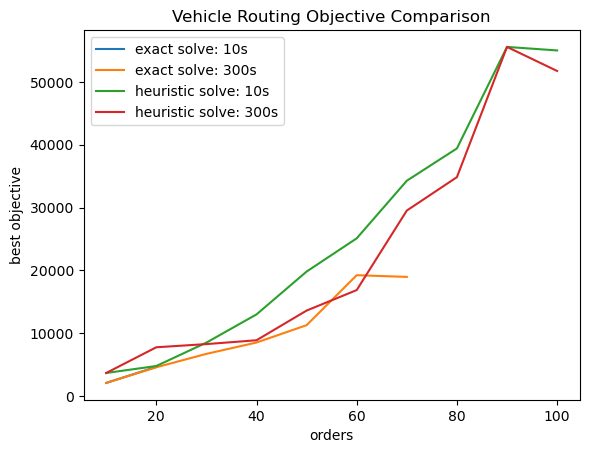

In [72]:
for (solve, time), gdb in gb.items():
    plt.plot(gdb['orders'], gdb['best_solution'], label=f'{solve} solve: {time}s')

plt.xlabel("orders")
plt.ylabel("best objective")
plt.title('Vehicle Routing Objective Comparison')
plt.legend(loc="upper left")